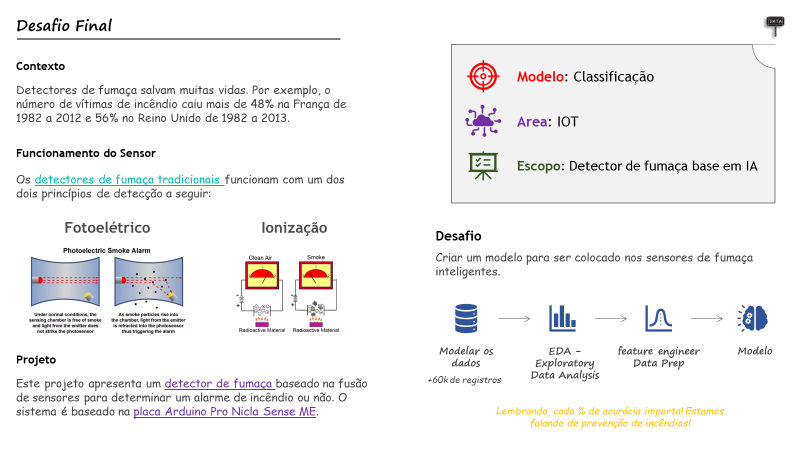

###  Case Detectores de Fumaça

Foram importados a base de dados enviado pelo time Data Viking com o objetivo de criar um modelo de classificação.


Material de apoio, funções e métricas utilizada conforme Bootcamp ministrado por Ronisson Lucas Calmon da Conceição e Odemir Depieri Jr.

**Descrição das Colunas**

*  Temperatura do Ar;
*   Umidade do Ar;
*   TVOC: Compostos Orgânicos Voláteis Totais; medido em partes por bilhão;
*   eCO2: concentração equivalente de co2; calculado a partir de valores diferentes como TVCO;
*  H2 bruto: hidrogênio molecular bruto; não compensado (Viés, temperatura, etc.);
*   Etanol bruto: gás etanol bruto;
*   Pressão do ar;
*   PM 1,0 e PM 2,5: tamanho do material particulado < 1,0 µm (PM1,0). 1,0 µm < 2,5 µm (PM2,5);
*   Alarme de incêndio: a verdade do solo é "1" se houver um incêndio;
*   CNT: contador de amostra;
*   UTC: timestamp UTC segundos;
*   NC0.5/NC1.0 e NC2.5: Concentração numérica de material particulado. Isso difere de PM porque NC fornece o número real de partículas no ar. O NC bruto também é classificado pelo tamanho de partícula: < 0,5 µm (NC0,5); 0,5 µm < 1,0 µm (NC1,0); 1,0 µm < 2,5 µm (NC2,5);

#### Importando os Dados



Neste primeiro momento vamos fazer uma verificação dos dados e conhecer de forma bastante generalizada a base e verificar se os primeiros e ultimos registros, colunas , tamanho do base de dados.

In [ ]:
#importando as biblotecas
# manipulação de dados
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier,
                              RandomForestClassifier,
                              ExtraTreesClassifier)
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report)

# warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dados_Detecção_Fumasa.csv to Dados_Detecção_Fumasa.csv


In [ ]:
#importando os dados
df = pd.read_csv('Dados_Detecção_Fumasa.csv')

In [ ]:
#verificando os 5 primeiros registros
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
#verificando os 5 ultimos registros
df.tail()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [ ]:
#quantidade de colunas e linhas
df.shape

(62630, 16)

In [ ]:
#nome de cada colunas
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [ ]:
# dtype de cada coluna
with pd.option_context('display.max_rows', 140, 'display.max_columns', 140):
     display(df.head(3))
     display(df.dtypes)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0


Unnamed: 0          int64
UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

#### 1. Limpeza dos Dados



Neste momento será realizado a limpeza dos dados que consiste em remover os dados duplicados, verificar se há dados ausentes na base de dados, tratar os dados categoricos.

In [ ]:
#removendo os dados duplicados
df.drop_duplicates(inplace = True, keep = False)

In [ ]:
#não há dados duplicados
df.shape

(62630, 16)

In [ ]:
#verificando valores unicos na base de dados
df.nunique()

Unnamed: 0        62630
UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

In [ ]:
#verificando valores ausentes na base de dados 
def check_missing(df):
    import pandas
    if isinstance(df, pandas.core.frame.DataFrame):
        return (((df.isnull().sum()/df.shape[0])*100).round(2)).sort_values(ascending = False)
    return None
check_missing(df)

Unnamed: 0        0.0
UTC               0.0
Temperature[C]    0.0
Humidity[%]       0.0
TVOC[ppb]         0.0
eCO2[ppm]         0.0
Raw H2            0.0
Raw Ethanol       0.0
Pressure[hPa]     0.0
PM1.0             0.0
PM2.5             0.0
NC0.5             0.0
NC1.0             0.0
NC2.5             0.0
CNT               0.0
Fire Alarm        0.0
dtype: float64

In [ ]:
#removendo as colunas que não serão utilizadas na análise
cols = ['Unnamed: 0', 'UTC', 'CNT','NC2.5','NC1.0','NC0.5','PM2.5','PM1.0']
df.drop(columns = cols, inplace = True)

In [ ]:
# renomeando as colunas 
cols = {
    'Temperature[C]': 'Temperature',
    'Humidity[%]': 'Humidity',
    'TVOC[ppb]': 'TVOC',
    'eCO2[ppm]': 'eCO2',
    'Pressure[hPa]': 'Press.Ar',
    'Raw H2': 'Raw_H2',
    'Raw Ethanol': 'Raw_Ethanol',
    'Fire Alarm': 'Fire_Alarm',
}
df.rename(columns = cols, inplace = True)

Agora vamos tratar a coluna categórica Fire_Alarm:

In [ ]:
#valores únicos
np.sort(df['Fire_Alarm'].unique())

array([0, 1])

In [ ]:
#percentual de incendio na base de dados
df['Fire_Alarm'].value_counts(normalize = True)*100

1    71.462558
0    28.537442
Name: Fire_Alarm, dtype: float64

De acordo com o alto percentual apresentado da classe 1 (sim) de Alarme Incêndio na base de dados, iniciamos a primeira hipótese de que houve um alto indice de alarme falso, desta forma abordaremos alguns filtros para limpar os possiveis alarmes falsos e assim preparar a base de dados para a modelagem de machine learning. 

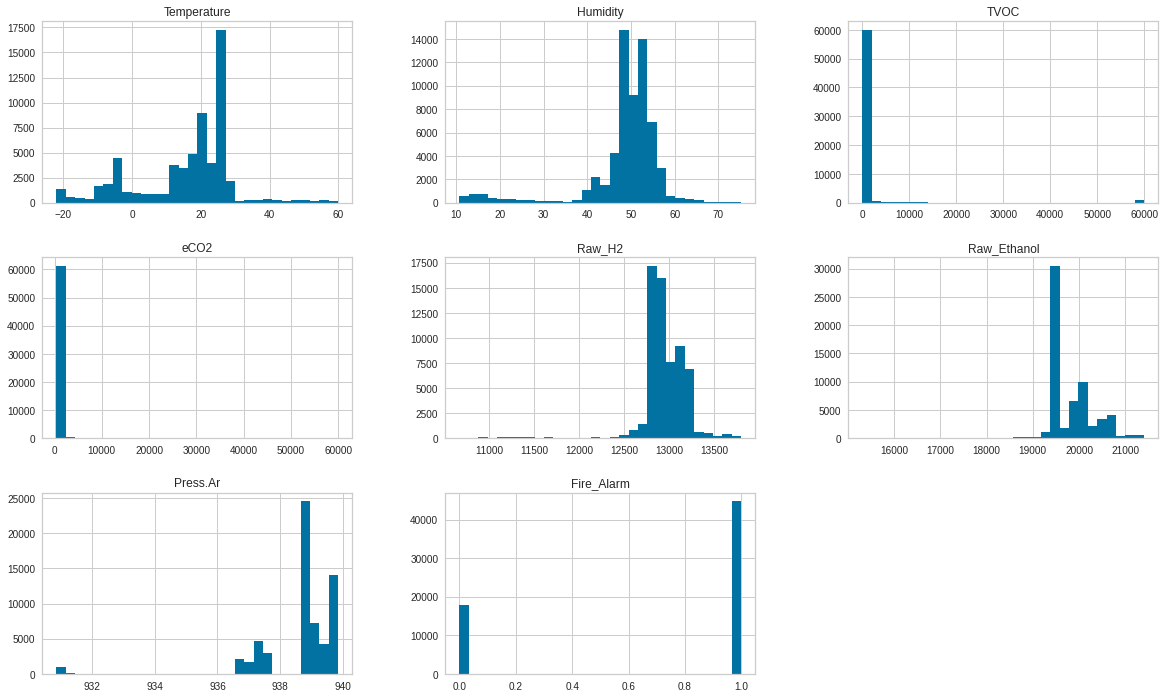

In [ ]:
#histograma das features
df.hist(figsize = (20, 12), bins = 30);

Diante das distribuição dos dados com a visualização do histograma, é possivel perceber temperaturas com valores negativos com também valores mais de Humidade mais extremos >50 o que pode caracterizar as fumaças de Vaper (Vaporização).

In [ ]:
# filtra os dados em relação a humidade alta e temperaturas negativas
df01 = df[(df['Temperature']> 0) & (df['Humidity']<50)]

In [ ]:
#quantidade de colunas e linhas após o filtro
df01.shape

(25565, 8)

In [ ]:
#percentual de incendio na base de dados após o filtro, agora temos as classes balanceadas
df01['Fire_Alarm'].value_counts(normalize = True)*100

1    57.43008
0    42.56992
Name: Fire_Alarm, dtype: float64

In [ ]:
def tratar_FA(FA):
    if FA == 0 :
        return 'No'
    else:
        return 'Yes'

In [ ]:
df01['Fire_Alarm'].apply(tratar_FA).value_counts(normalize = True)*100

Yes    57.43008
No     42.56992
Name: Fire_Alarm, dtype: float64

#### 2. Análise Estatística

Nesta seção faremos algumas visualizações estatísticas com a finalidade de sumarizar os dados e suas relações.

Esta abordagem de gerar os BoxPlots, Histograma e Densidades, nós dá um overview de como os dados estão distribuidos na base e também contribuem para identificar de forma muito rápida os outliers de cada features 

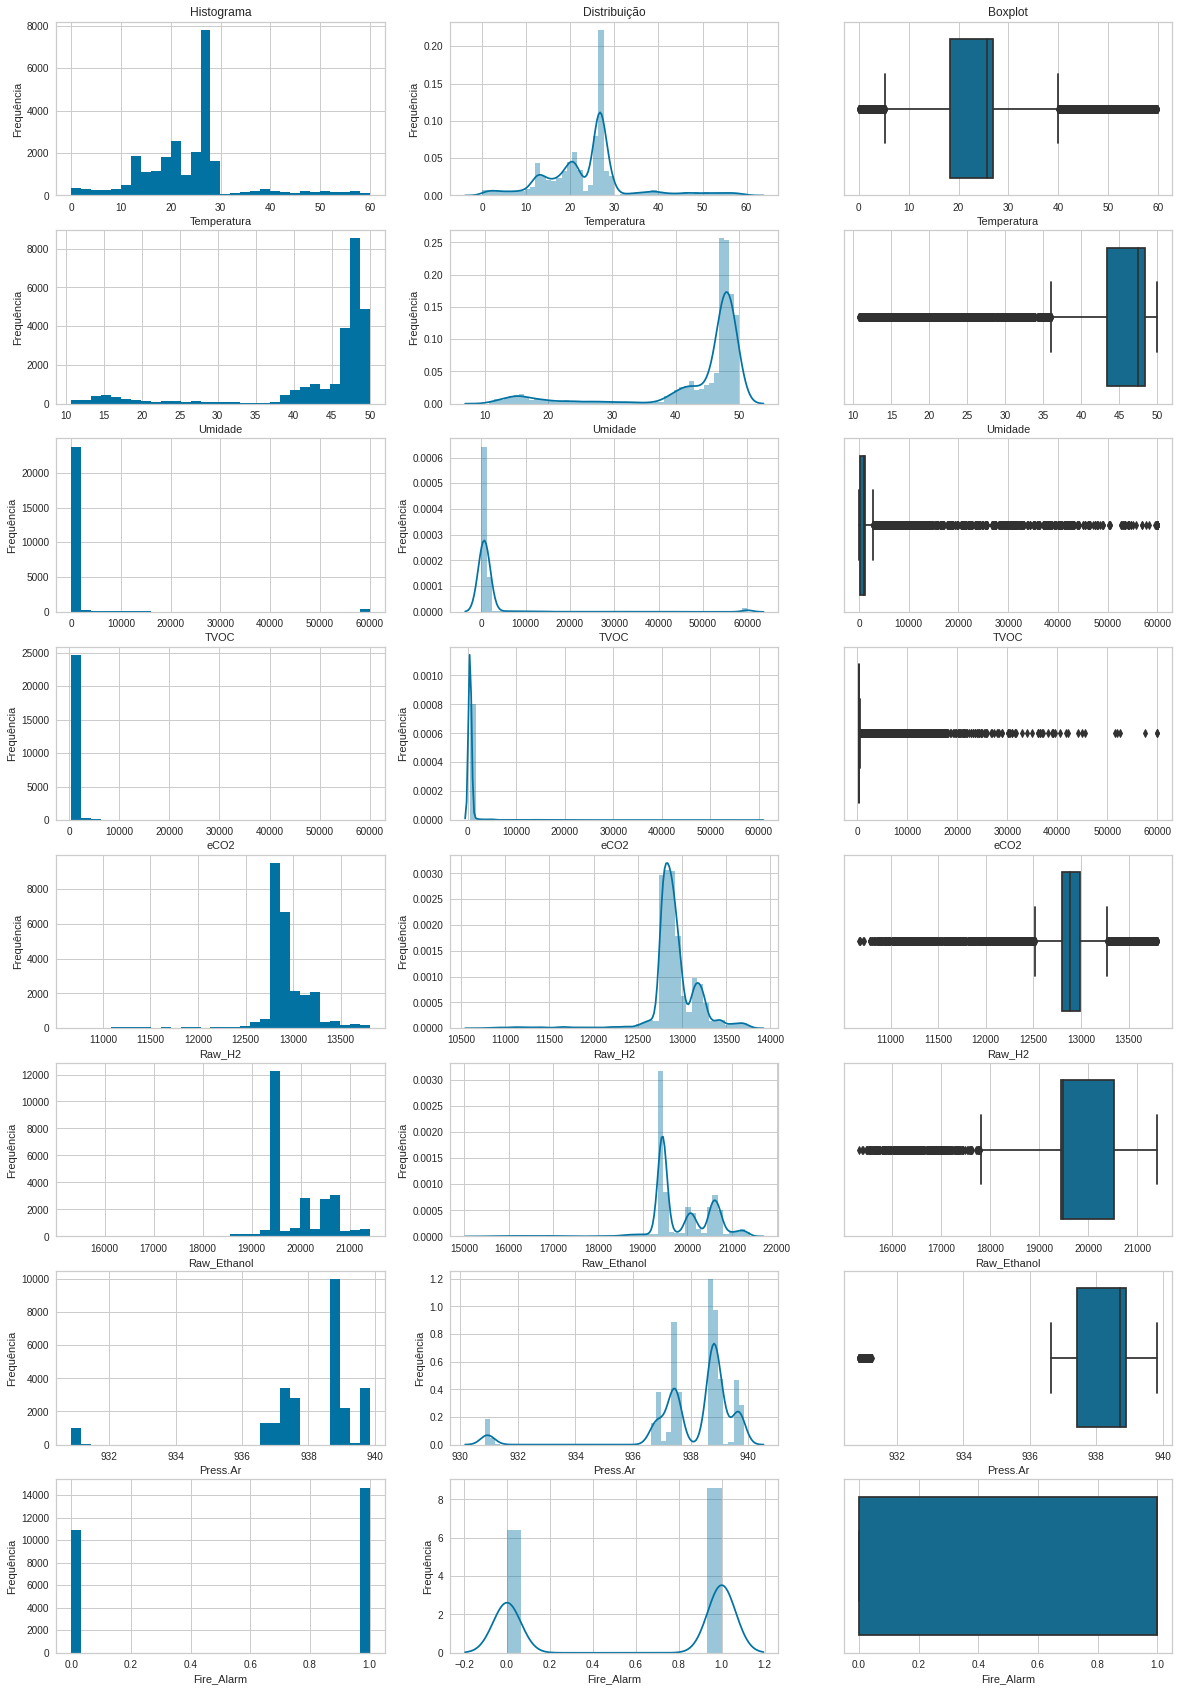

In [ ]:
fig, ax = plt.subplots(8, 3, figsize = (20, 30))
# título da figura
#fig.suptitle('Perfil das Features', 
             #fontsize = 20, fontweight = 'bold')
# insere um histograma da idade no eixo ax[0,0]
ax[0, 0].hist(df01['Temperature'], bins = 30)
# altera os labels do eixo ax[0,0]
ax[0, 0].set(xlabel = 'Temperatura', ylabel = 'Frequência')
ax[0, 0].set_title('Histograma')
# distribuição da temperatura no eixo ax[1,0] e altera os labels
sns.distplot(df01['Temperature'], ax = ax[0, 1])
# altera os labels do eix[0,1]
ax[0, 1].set(xlabel = 'Temperatura', ylabel = 'Frequência')
ax[0, 1].set_title('Distribuição')
# boxplot da idade no eixo ax[0,2] e altera os labels
sns.boxplot(data = df01, x = 'Temperature', ax = ax[0, 2])
ax[0, 2].set(xlabel = 'Temperatura', title = 'Boxplot')
# insere um histograma da idade no eixo ax[0,0]
ax[1, 0].hist(df01['Humidity'], bins = 30)
# altera os labels do eixo ax[0,0]
ax[1, 0].set(xlabel = 'Umidade', ylabel = 'Frequência')
# distribuição da temperatura no eixo ax[1,0] e altera os labels
sns.distplot(df01['Humidity'], ax = ax[1, 1])
# altera os labels do eix[0,1]
ax[1, 1].set(xlabel = 'Umidade', ylabel = 'Frequência')
# boxplot da idade no eixo ax[0,2] e altera os labels
sns.boxplot(data = df01, x = 'Humidity', ax = ax[1, 2])
ax[1, 2].set(xlabel = 'Umidade')
# insere um histograma da idade no eixo ax[0,0]
ax[2, 0].hist(df01['TVOC'], bins = 30)
# altera os labels do eixo ax[0,0]
ax[2, 0].set(xlabel = 'TVOC', ylabel = 'Frequência')
# distribuição da temperatura no eixo ax[1,0] e altera os labels
sns.distplot(df01['TVOC'], ax = ax[2, 1])
# altera os labels do eix[0,1]
ax[2, 1].set(xlabel = 'TVOC', ylabel = 'Frequência')
# boxplot da idade no eixo ax[0,2] e altera os labels
sns.boxplot(data = df01, x = 'TVOC', ax = ax[2, 2])
ax[2, 2].set(xlabel = 'TVOC')
ax[3, 0].hist(df01['eCO2'], bins = 30)
# altera os labels do eixo ax[0,0]
ax[3, 0].set(xlabel = 'eCO2', ylabel = 'Frequência')
# distribuição da temperatura no eixo ax[1,0] e altera os labels
sns.distplot(df01['eCO2'], ax = ax[3, 1])
# altera os labels do eix[0,1]
ax[3, 1].set(xlabel = 'eCO2', ylabel = 'Frequência')
# boxplot da idade no eixo ax[0,2] e altera os labels
sns.boxplot(data = df01, x = 'eCO2', ax = ax[3, 2])
ax[3, 2].set(xlabel = 'eCO2')
ax[4, 0].hist(df01['Raw_H2'], bins = 30)
# altera os labels do eixo ax[0,0]
ax[4, 0].set(xlabel = 'Raw_H2', ylabel = 'Frequência')
# distribuição da temperatura no eixo ax[1,0] e altera os labels
sns.distplot(df01['Raw_H2'], ax = ax[4, 1])
# altera os labels do eix[0,1]
ax[4, 1].set(xlabel = 'Raw_H2', ylabel = 'Frequência')
# boxplot da idade no eixo ax[0,2] e altera os labels
sns.boxplot(data = df01, x = 'Raw_H2', ax = ax[4, 2])
ax[4, 2].set(xlabel = 'Raw_H2')
ax[5, 0].hist(df01['Raw_Ethanol'], bins = 30)
# altera os labels do eixo ax[0,0]
ax[5, 0].set(xlabel = 'Raw_Ethanol', ylabel = 'Frequência')
# distribuição da temperatura no eixo ax[1,0] e altera os labels
sns.distplot(df01['Raw_Ethanol'], ax = ax[5, 1])
# altera os labels do eix[0,1]
ax[5, 1].set(xlabel = 'Raw_Ethanol', ylabel = 'Frequência')
# boxplot da idade no eixo ax[0,2] e altera os labels
sns.boxplot(data = df01, x = 'Raw_Ethanol', ax = ax[5, 2])
ax[5, 2].set(xlabel = 'Raw_Ethanol')
ax[6, 0].hist(df01['Press.Ar'], bins = 30)
# altera os labels do eixo ax[0,0]
ax[6, 0].set(xlabel = 'Press.Ar', ylabel = 'Frequência')
# distribuição da temperatura no eixo ax[1,0] e altera os labels
sns.distplot(df01['Press.Ar'], ax = ax[6, 1])
# altera os labels do eix[0,1]
ax[6, 1].set(xlabel = 'Press.Ar', ylabel = 'Frequência')
# boxplot da idade no eixo ax[0,2] e altera os labels
sns.boxplot(data = df01, x = 'Press.Ar', ax = ax[6, 2])
ax[6, 2].set(xlabel = 'Press.Ar')
ax[7, 0].hist(df01['Fire_Alarm'], bins = 30)
# altera os labels do eixo ax[0,0]
ax[7, 0].set(xlabel = 'Fire_Alarm', ylabel = 'Frequência')
# distribuição da temperatura no eixo ax[1,0] e altera os labels
sns.distplot(df01['Fire_Alarm'], ax = ax[7, 1])
# altera os labels do eix[0,1]
ax[7, 1].set(xlabel = 'Fire_Alarm', ylabel = 'Frequência')
# boxplot da idade no eixo ax[0,2] e altera os labels
sns.boxplot(data = df01, x = 'Fire_Alarm', ax = ax[7, 2])
ax[7, 2].set(xlabel = 'Fire_Alarm');

Importante mencionar a presença de alguns outliers para TVOC (Composto Orgânicos Voláteis)e eCO2 (Concetrações em ppm do CO2) o que caracteriza as fumaças de incêndios, conforme literatura mencioando abaixo;

https://www.ecodebate.com.br/2017/04/24/concentracao-de-co2-na-atmosfera-chega-410-ppm-artigo-de-jose-eustaquio-diniz-alves/


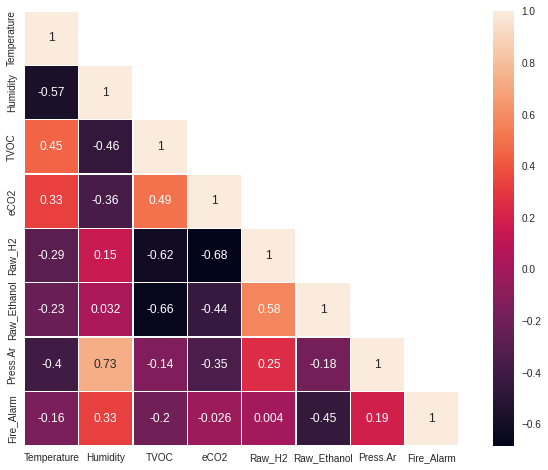

In [ ]:
# matriz de correlação de Pearson
def plot_corr(corr):
    # Cortaremos a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5,  annot=True, square=True)
# Calculando a correlação
corr = df01.corr() 
plt.figure(figsize=(12,8))
plot_corr(corr)

Correlação é a medida entre duas ou mais variáveis que se relacionam.

Uma correlação positiva indica que as duas variáveis movem juntas, e a relação é forte quanto mais a correlação se aproxima de um. Uma correlação negativa indica que as duas variáveis movem-se em direções opostas, e que a relação também fica mais forte quanto mais próxima de menos 1 a correlação ficar.

Alta correlação para variaveis que não são preditivas tende a ter um viés para modelo de machine learning, pois as variáveis indica o mesmo comportamento.

As variaveis de Humidade e Raw Ethanol indicam uma boa correlação com a variável preditiva (Fire Alarm), o que pode influenciar e explicar o os alarmes de incêndio, com a estatistica descritva e a vizualização de dados vamos entender melhor o esse comportamento e como as variaveis se relacionam.

In [ ]:
#Estatistica Descritiva
df01.describe()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Press.Ar,Fire_Alarm
count,25565.000000,25565.000000,25565.000000,25565.000000,25565.000000,25565.000000,25565.000000,25565.000000
mean,23.686352,43.416997,2590.449951,801.926892,12906.313163,19839.210131,938.072917,0.574301
std,9.926009,9.656410,9199.176435,2408.742240,305.970315,739.794753,1.727425,0.494458
min,0.024000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000
25%,18.270000,43.420000,106.000000,400.000000,12800.000000,19436.000000,937.415000,0.000000
50%,25.640000,47.450000,1042.000000,406.000000,12881.000000,19476.000000,938.719000,1.000000
75%,26.990000,48.370000,1187.000000,456.000000,12991.000000,20529.000000,938.910000,1.000000
max,59.930000,49.990000,60000.000000,60000.000000,13803.000000,21410.000000,939.843000,1.000000


Através da estatística descritiva mostra as contagens, média, desvio padrão (std), mínimo (min), percentil 25%, mediana (percentil 50%), percentil 75% e valor máximo (max) na coluna. Para explicar alguns desses termos, podemos dizer que:

Contagem - número total de valores não nulos presentes em cada coluna.

média - média dos valores de cada atributo no conjunto de dados

min - valor mínimo de cada atributo no conjunto de dados

25% (25% Percentil) - 25% dos dados são menores que esse valor

50% (50% Percentil) - 50% dos dados é menor que esse valor, também é o mesmo que a mediana

75% (percentil de 75%) - 75% dos dados são menores que esse valor

max - valor máximo de cada atributo no conjunto de dados

Após o tratamento dos dados é possivel evidenciar uma baixa variabilidade dos dados entre as features, o qual podemos notar quando olhamos para média e mediana. 

A seguir, para um melhor entendimento, analisaremos a dispersão dos dados o qual podemos ter uma primeira impressão dos relacionamentos das features, como também vamos aprofundar com mais detalhes em alguns comportamentos.

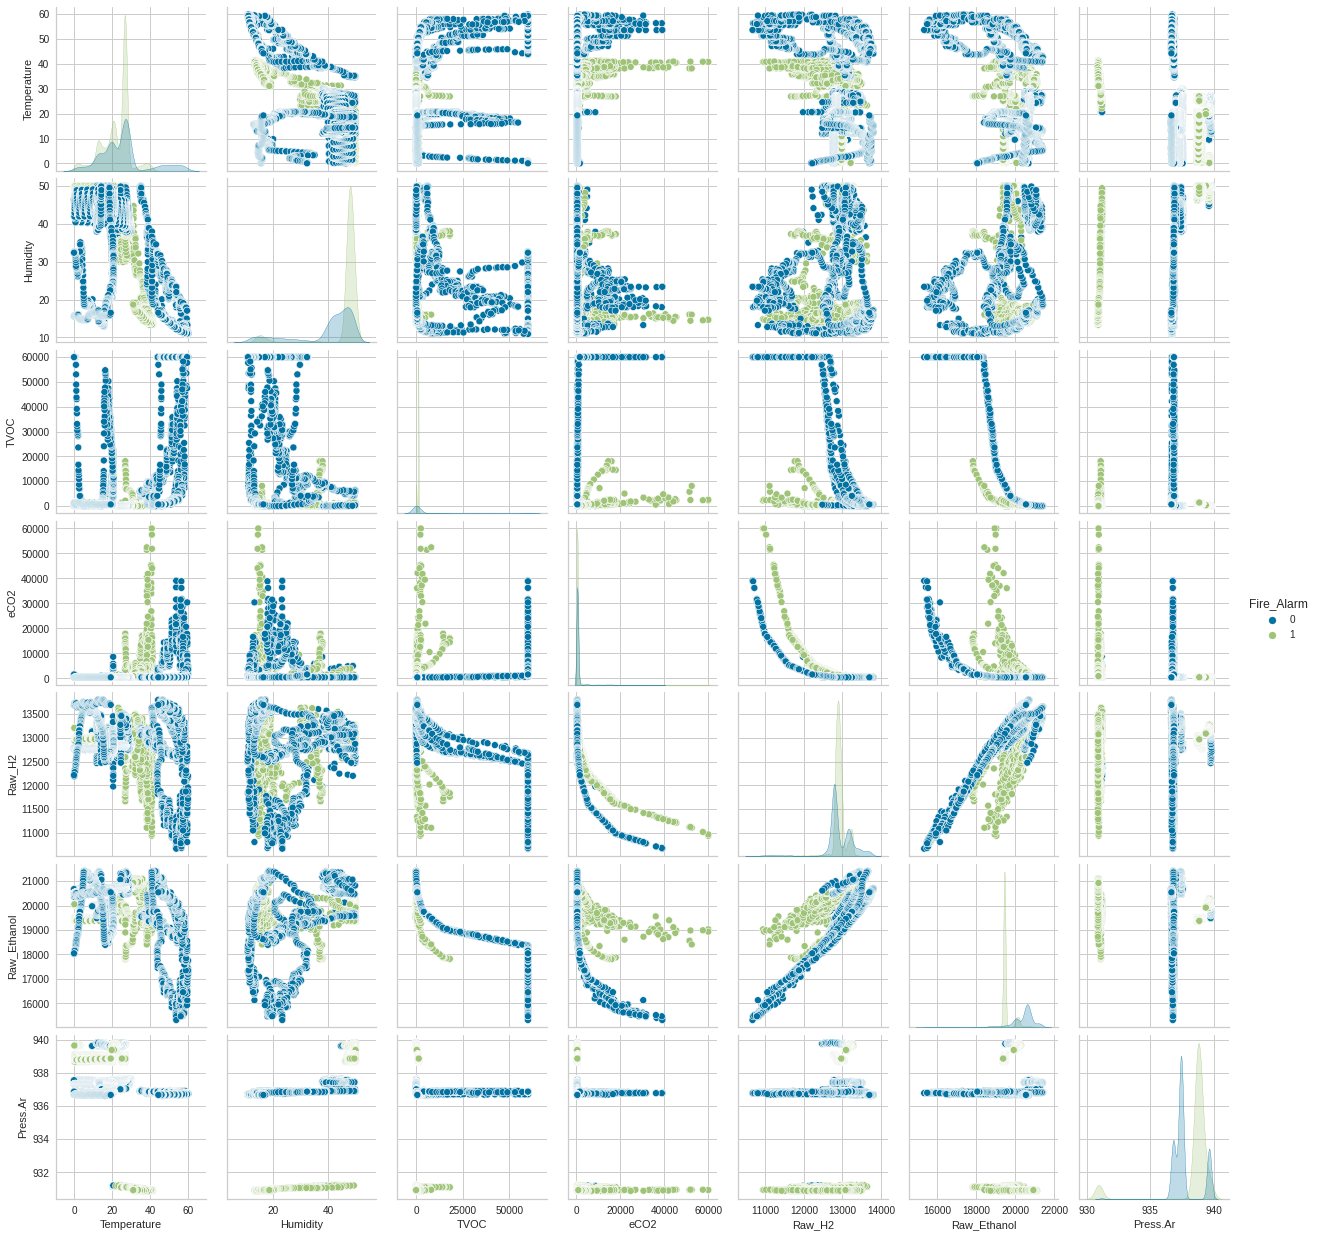

In [ ]:
#overview das features, 
figure = sns.pairplot(df01, hue = 'Fire_Alarm');

#### 3. Visualização dos dados

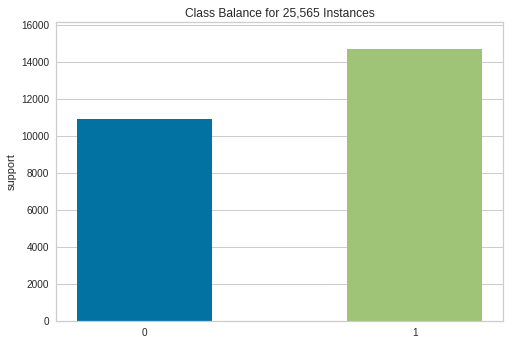

In [ ]:
#analisando o balanço de classes
from yellowbrick.target import ClassBalance
#instanciar
Viz = ClassBalance(labels=[0,1])
Viz.fit(df01['Fire_Alarm'])
Viz.show();

Podemos notar uma boa proporção entre os alarmes de incêndio presente na base de dados.

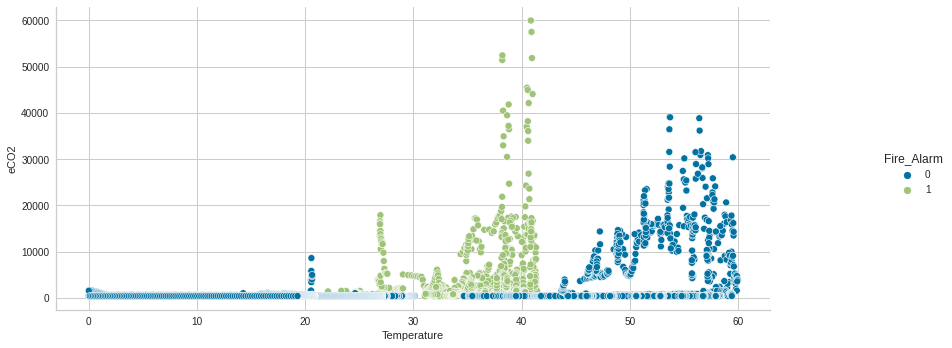

In [ ]:
graf = sns.relplot(data = df01, x = 'Temperature', y = 'eCO2', hue = 'Fire_Alarm')
graf.figure.set_size_inches(15,5)

Maiores incidências de alarme ocorrem com a Temperatura entre 30 - 40ºC e com concetrações elevado de CO2 (ppm).

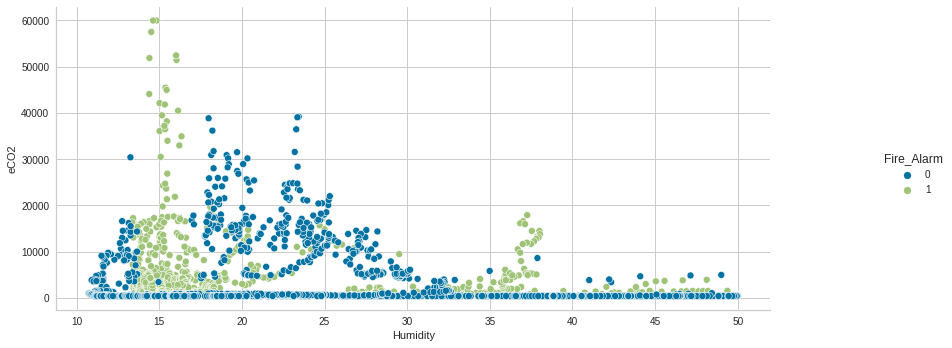

In [ ]:
graf = sns.relplot(data = df01, x = 'Humidity', y = 'eCO2', hue = 'Fire_Alarm')
graf.figure.set_size_inches(15,5)

Mesmo cenário de incidências de alarme ocorrendo com a umidade <30 e com concetrações elevado de CO2 (ppm) caracterizando a Fumaça de incêndio

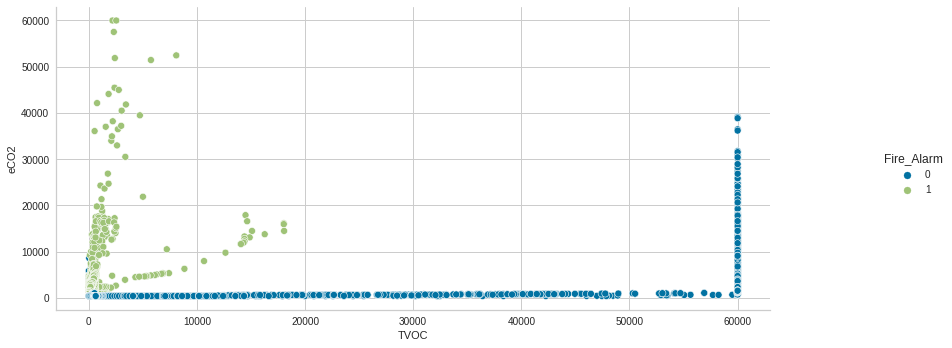

In [ ]:
graf = sns.relplot(data = df01, x = 'TVOC', y = 'eCO2', hue = 'Fire_Alarm')
graf.figure.set_size_inches(15,5)

Aqui mais um sinal da caracterização das Fumaças de Incêndio, neste cenário com concentrações elevadas dos compostos orgânicos voláteis

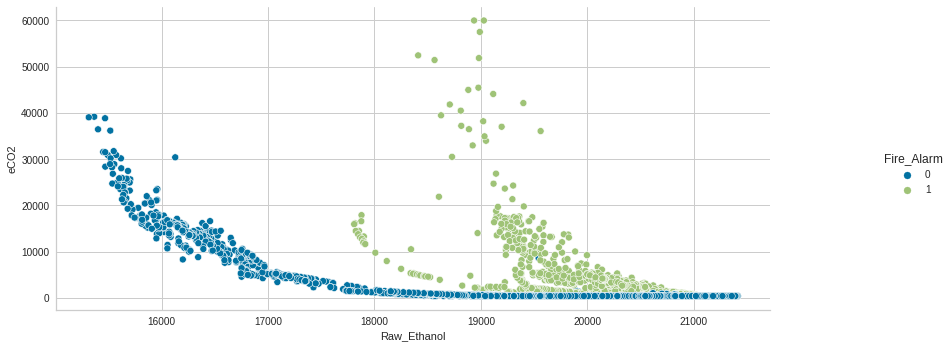

In [ ]:
graf = sns.relplot(data = df01, x = 'Raw_Ethanol', y = 'eCO2', hue = 'Fire_Alarm')
graf.figure.set_size_inches(15,5)

Podemos notar com mais clareza o comportamento dos Alarmes, quando olhamos para o Gás Etanol Bruto e a concentração do CO2

#### 4. Preparação dos dados 

Iremos utilizar a abordagem do método MinMaxScaler que dimensiona todos os recursos de dados no intervalo [0, 1] ou então no intervalo [-1, 1] se houver valores negativos no conjunto de dados. Esta escala comprime todos os inliers na faixa estreita [0, 0,005] 

In [ ]:
#Separar os dados
X = df01.drop( columns=['Fire_Alarm'] )
y = df01['Fire_Alarm']

X.shape, y.shape

((25565, 7), (25565,))

In [ ]:
#normalização
from sklearn.preprocessing import MinMaxScaler

Funcao_Min = MinMaxScaler()
DadosMin = Funcao_Min.fit_transform(X)

In [ ]:
#dados normalizados
DadosMin

array([[0.33879745, 0.99923567, 0.        , ..., 0.58181818, 0.68472017,
        0.99032366],
       [0.33903115, 0.99592357, 0.        , ..., 0.58277512, 0.68472017,
        0.99121344],
       [0.33926485, 0.99414013, 0.        , ..., 0.58373206, 0.68701789,
        0.99188077],
       ...,
       [0.31454278, 0.12993631, 0.01045   , ..., 0.97511962, 0.86410635,
        0.64898232],
       [0.31814843, 0.13503185, 0.01063333, ..., 0.97097289, 0.86148039,
        0.64820376],
       [0.32175408, 0.14726115, 0.01071667, ..., 0.96586922, 0.85770556,
        0.64775887]])

#### 5. Modelagem ML

Nesta etapa é realizada a modelagem preditiva do Alarme de Incêndio em relação as Features (Umidade,Temperatura,TVOC e entre outras) estaremos utilizando os algoritmos de Gradient Boosting Classifier, Random Florest Classifier, Árvore de Decisão , KNN e Regressão Logística , para analisar qual o modelo se comporta melhor na classificação da nossa target.

In [ ]:
#matriz de variáveis explicativas
X = df01.drop( columns=['Fire_Alarm'] )
#target
y = df01['Fire_Alarm']
#semente
Seed = 99
#separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state = Seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#instanciando os modelos
Model_GB = GradientBoostingClassifier(random_state=10, min_samples_leaf=5, max_depth=4)
Model_RF = RandomForestClassifier( random_state=10, n_estimators=250, min_samples_leaf=5, max_depth=3 )
Model_Tree = DecisionTreeClassifier(random_state=10, min_samples_leaf=5, max_depth=3)
Model_KNN = KNeighborsClassifier(n_neighbors=5)
Model_LR = LogisticRegression()

#treinando os modelos
Model_GB.fit(X_train, y_train)
Model_RF.fit(X_train, y_train)
Model_Tree.fit(X_train, y_train)
Model_KNN.fit(X_train, y_train)
Model_LR.fit(X_train, y_train)

(20452, 7) (5113, 7) (20452,) (5113,)


LogisticRegression()

#### 6. Avaliação das Métricas dos Modelos 

Aqui aplicaremos a prática de avaliação da precisão do modelo, avaliaremos sua qualidade através da Acurácia , Relatório de Classificação e Matriz de Confusão.

In [ ]:
#performance dos modelos em treino e teste
print('Accuracy GB - Test:', accuracy_score(y_test, Model_GB.predict(X_test)))
print('Accuracy GB - Train:', accuracy_score(y_train, Model_GB.predict(X_train)))
print('Accuracy RF - Test:', accuracy_score(y_test, Model_RF.predict(X_test))) 
print('Accuracy RF - Train:', accuracy_score(y_train, Model_RF.predict(X_train)))
print('Accuracy Tree - Test:', accuracy_score(y_test, Model_Tree.predict(X_test))) 
print('Accuracy Tree - Train:', accuracy_score(y_train, Model_Tree.predict(X_train)))
print('Accuracy KNN - Test:', accuracy_score(y_test, Model_KNN.predict(X_test))) 
print('Accuracy KNN - Train:', accuracy_score(y_train, Model_KNN.predict(X_train)))
print('Accuracy LR - Test:', accuracy_score(y_test, Model_LR.predict(X_test))) 
print('Accuracy LR - Train:', accuracy_score(y_train, Model_LR.predict(X_train)))

Accuracy GB - Test: 1.0
Accuracy GB - Train: 1.0
Accuracy RF - Test: 0.9507138666145121
Accuracy RF - Train: 0.9497848621161744
Accuracy Tree - Test: 0.9823978095051829
Accuracy Tree - Train: 0.9822511245843927
Accuracy KNN - Test: 0.9990221005280657
Accuracy KNN - Train: 0.999315470369646
Accuracy LR - Test: 0.8744377078036378
Accuracy LR - Train: 0.8785448855857618


A Accuracy nos diz quanto o meu modelo acertou das previsões possiveis, os modelos Ensembles que são mais robustos como Gradient Boosting, Random Forest e Arvore de Decisão teve um performance próximo de 100% (possiveis sobreajustes), Regressão Logistica apresenta com uma performance inferior porém bem aceitável e apresenta entre treino e teste o conceito de generalização

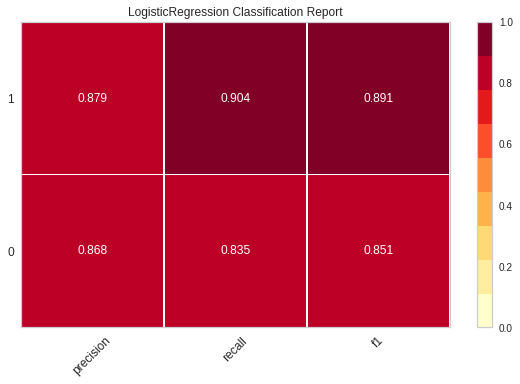

In [ ]:
#Relatório de Classificação
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
viz = ClassificationReport(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

Explorando com mais detalhes o modelo de Regressão Logistica através do relatório de Classificação podemos afirmar que para o métrica Precision que indica o qual bem o modelo trabalho para as classes Positivas e Negativas há uma proporcionalidade entre elas, para Recall indica o quão bom o modelo é para prever as classes, sendo que para a classe positiva demonstra uma melhor performance e o F1 score nos mostra o balanço entre a precisão e o recall de nosso modelo o que também temos uma proporcinalidade.

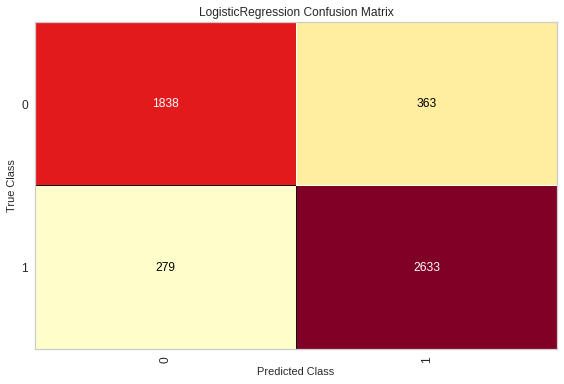

<Figure size 576x396 with 0 Axes>

In [ ]:
#Matriz de Confusão
from yellowbrick.classifier import confusion_matrix

# Instantiate the visualizer with the classification model
confusion_matrix(
    Model_LR,
    X_train, y_train, X_test, y_test)
plt.tight_layout()

Uma matriz de confusão é uma tabela que indica os erros e acertos do modelo, comparando com o resultado esperado, interpretando os resultados obtidos temos 1838 como Verdadeiros Negativos (classificação correta da classe Negativo) e 2633 como Verdadeiros Positivos (classificação correta da classe Positivo) e 
363 como Falsos Negativos erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo e 279 Falsos Positivos erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo

#### Validação Cruzada para o modelo de Regressão Logistica

Validação cruzada é uma técnica para avaliar modelos de ML por meio de treinamento de vários modelos de ML em subconjuntos de dados de entrada disponíveis e avaliação deles no subconjunto complementar dos dados.

O método de validação cruzada denominado k-fold consiste em dividir o conjunto total de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho e, a partir daí, um subconjunto é utilizado para teste e os k-1 restantes são utilizados para estimação dos parâmetros, fazendo-se o cálculo da acurácia do model

Para este case iremos dividir o conjunto total dos dados em 3 partes (cv=3).

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

#instanciando o modelo CV
Model_LR_CV = LogisticRegressionCV(cv=3, random_state=10)

#treinando o modelo CV
Model_LR_CV.fit(X_train, y_train)


LogisticRegressionCV(cv=3, random_state=10)

In [ ]:
print('Accuracy LR_CV - Test:', accuracy_score(y_test, Model_LR_CV.predict(X_test))) 
print('Accuracy LR_CV - Train:', accuracy_score(y_train, Model_LR_CV.predict(X_train)))

Accuracy LR_CV - Test: 0.8803051046352435
Accuracy LR_CV - Train: 0.8838744377078036


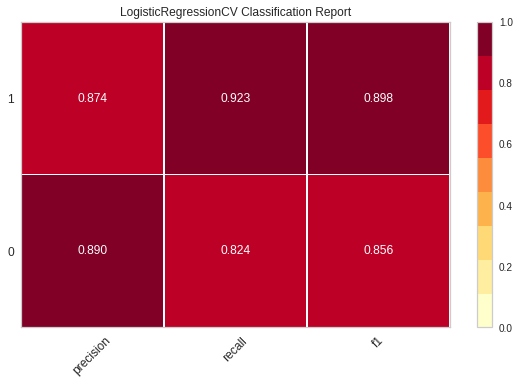

In [ ]:
viz_CV = ClassificationReport(LogisticRegressionCV(cv=3, random_state=10))
viz_CV.fit(X_train, y_train)
viz_CV.score(X_test, y_test)
viz_CV.show()

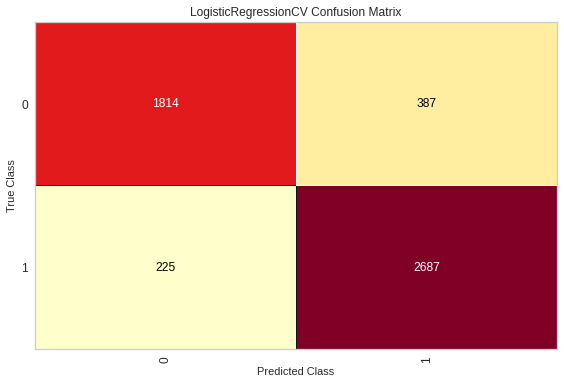

<Figure size 576x396 with 0 Axes>

In [ ]:
# Instantiate the visualizer with the classification model
confusion_matrix(
    Model_LR_CV,
    X_train, y_train, X_test, y_test)
plt.tight_layout()

Após a implementação da Validação Cruzada houve uma melhora na performance do modelo de Regressão Logistica comparada com as interações anteriores. 

In [ ]:
#Features Importance
importanceCV= Model_LR_CV.coef_[0]
importance=np.sort(importanceCV)
importance

array([-0.0704171 , -0.00703994, -0.00146046,  0.00075444,  0.0015811 ,
        0.02436698,  0.14266488])

In [ ]:
#ranking das features importance no modelo
pd.Series(importance, index=X.columns).sort_values( ascending=False )

Press.Ar       0.142665
Raw_Ethanol    0.024367
Raw_H2         0.001581
eCO2           0.000754
TVOC          -0.001460
Humidity      -0.007040
Temperature   -0.070417
dtype: float64

#### 7. Report

#### 8. Conclusão

Em virtudes dos dados apresentados, foi realizado vários experimentos e interações em busca dos melhores parâmetros para as predições dos modelos.

Realizamos a mineração dos dados em função do dataset disponibilizados para o estudo do caso no Desafio Final do Bootcamp e posteriormente usarmos como entrada nos modelos.

Após as análises dos resultados dos modelos utilizados, verificamos que os valores das métricas de Score, Matriz de Confusão e o Relatório de Classificação que apresenta o melhor desempenho foi o Regressão Logistica, isso significa que o modelo passa a explicar mais os dados em relação aos outros, apesar do Score ser menor e a Matriz de Confusão apresentar alguns erros nas classificações que os demais modelos, o que nos indica uma boa generalização do modelo.

Detalhando o conceito de Generalização, é a capacidade do modelo de dar resultados razoáveis para conjuntos de dados que ele nunca viu antes, e um modelo que generaliza bem é um modelo que não é nem insuficiente nem excessivo.


#### Próximos Passos
*   Validar o modelo de Regressão Logistica com novos dados de testes;
*   Modelar algoritmos de machine learning alternativos;
*   Escalar o modelo em produção para uma plataforma IoT;
*   Estrutura uma solução em nuvem para o processamento dos dados;
*   Acompanhamento de degradação do modelo em relação ao tempo;
*   Atualização com aprendizado online do modelo.









